# SYRIATEL TELECOM ANALYSIS

![telecommunication tower](images/raisting-satellite1.jpg)

Image by <a href="https://pixabay.com/users/mmisof-1574106/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1010862">Michael Misof</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1010862">Pixabay</a>

## 1. Business Understanding

After just a month into the **SyriaTel internship**, an email has just arrived into my inbox with an urgent tag on the subject. The **Customer Acquisition and Management team**, **The sales team**, and **The Product Development team** are requesting the data science department to help with insight into customer behaviour. 

The Acquisition team wants to be able to detect customers likely to unsubscribe from the service, the Product development team wants to know for the clients who leave, what kinds of products were they dissatisfied with that might have caused them to leave, and what new products might they produce for the existing customers, the sales team on the other hand wants to know the amount of revenue they might lose, if the customers were to leave.

After a discussion with my supervisor, we have reached the conclusion that with the available dataset, for this particular project we will be checking for churn, that is, detecting if a client might terminate subscription, we'll also check the dataset to suggest some new products for the Product development team. We will however not check for the product/reason that might have led to the churn, nor the amount of revenue lost as a result of the churn, as the dataset available won't allow for these. 

The project will take a week to complete, and the analysis will be considered a success if we'll be able to predict the correct outcome with atleast 85% accuracy.



## 2. Data Understanding
The dataset is contained in a CSV(comma separated Values) file, and is stored in the *data/* folder in the current folder. <br>
The target we'll be using is the churn column, that indicates to us if the client churned or not. <br>
Our dataset contains 3333 datapoints/rows and 21 columns giving details about each datapoint. Which is not a lot, but enough for this particular analysis. 

The dataset available contains information about a particular customer, and it can be downloaded from Kaggle at [SyriaTel Dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).<br> After some EDA on the data, we might drop some columns, or add new ones depending on the needs of the project, and probably normalize the dataset before fitting it in our model.

The features include;
* **state**  - State where the customer resides.
* **account length** - period the customer has been subscribed to the service
* **area code** - area code of the customer
* **phone number** - clients phone number
* **international plan** - indicates if the customer has an international plan or not
* **voice mail plan** - indicates if the client has a voice mail plan or not
* **number vmail messages** - number of voice mail messages
* **total day minutes, calls, charge** - total minutes, calls and charge of the customer in the day
* **total eve minutes, calls, charge** - total minutes, calls and charge of the customer in the evening
* **total night minutes, calls, charge** - total minutes, calls and charge of the customer in the night
* **total intl minutes, calls, charge** - total international minutes, calls and charge of the customer.
* **customer service calls** - number of calls made to the customer service
* **churn** - our target


## 3. Data Preparation

### 3.1 Module imports and Data Loading 

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# scipy imports
import scipy.stats as stats

# statsmodel imports
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# imports from imblearn
from imblearn.over_sampling import SMOTE


In [2]:
# loading data
df = pd.read_csv('data/telecom_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above information about the dataset, we can see that all of the columns have values, and the datatypes also match with each column in the dataset. 

Let's move into some descriptive statistics about our dataset.

### 3.2 Descriptive Statistics

In [4]:
# check for data statistical values
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Looking at the maximum, minimum and mean values of each of our columns, we can see that our columns are not on the same unit. <br>
This can lead to false results, when used with algorithms that are distance based like K-Nearest Neighbors, and for this, normalization of these columns will be necessary.

### 3.3 Data Cleaning
In this section, we will check to see if our data satisfies several aspects of a cleaned data set that is ready for modelling, in particular, we'll be checking to see if our dataset satisfies the below;

* Validity
* Completeness
* Consistency
* Uniformity

#### 3.3.1 Completeness
For our data to load properly and work in our models, we need not have any missing values in our dataset, this part of the cleaning process checks to see if we might have any missing/null values, and imputes them.

In [5]:
# check for null values in our 
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The above results shows us that we have no null value in our dataset, hence the completeness of the dataset has been satisfied, let's move on to consistency.

#### 3.3.2 Consistency
In consistency, we'll be checking to see if our dataset has any duplicates.

This being a dataset containing mobile subscribers, we can use the column phone number to check if there is any subscriber who appears more than once in our dataset.

In [6]:
df['phone number'].duplicated().sum()

0

We can see that our dataset has no duplicates

#### 3.3.3 Uniformity
This is the checking of column dataset to see if it matches the data contained in the column.

our target, churn column, has a boolean data type, lets convert it to integer

In [7]:
df["churn"] = df["churn"].astype(int)

#### 3.3.4 Validity
Here we check to see if all the columns in the dataset are valid/useful for this analysis, dropping any that isn't useful. We might need all our columns for this analysis, hence we'll retain all of them for now

In checking for validity, let's also convert the column names into a better format, by getting rid of the spaces in the names.

In [8]:
# get our columns
column_names = df.columns

# create an empty column holder
new_column_names = []

# replace our empty spaces
for item in column_names:
    new_column_names.append(item.replace(' ', '_'))

# rename the columns
df.columns = new_column_names
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Our dataset has satisfied the cleaning conditions, and thus ready for model and analysis.

### 3.4 Exploratory Data Analysis (EDA)

In trying to understand our data better, let's check for the distribution of the individual features in our dataset.


Answer a few questions;
* **What is the distribution of Expenditure by Time of the day?**
* **What is the distribution of Revenue by State?**
* **What is the distribution of revenue by Area Codes?**
* **What is the relationship between account length and Expenditure?**
* **What is the relationship between having a plan and expenditure?**




#### 3.4.1 Feature Engineering
To assist with the analysis, we shall add a new feature to our data set, representing the total expenditure by the customer, i.e day Expenditure plus evening expenditure, plus night and international calls.

In [9]:
df['total_expenditure'] = df['total_day_charge'] \
                        + df['total_eve_charge'] \
                        + df['total_night_charge'] \
                        + df['total_intl_charge']

df.head(10)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_expenditure
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,67.61
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,78.31
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,46.90
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,73.32
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,80.54


#### 3.4.2 Describe the distribution of Expenditure by Time of the day.
In this section, we'll check for the distribution of expenditure by the period of the day, to try and see the period of day that brings us the most revenue.

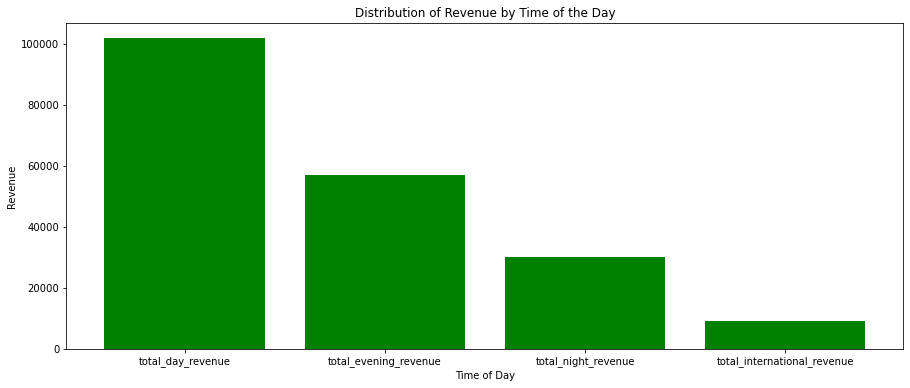

In [10]:
total_day_revenue = df['total_day_charge'].sum()
total_evening_revenue = df['total_eve_charge'].sum()
total_night_revenue = df['total_night_charge'].sum()
total_international_revenue = df['total_intl_charge'].sum()

fig, ax = plt.subplots(figsize=(15, 6))

time_of_day_value = [total_day_revenue, total_evening_revenue, total_night_revenue, total_international_revenue]
data_label = ['total_day_revenue', 'total_evening_revenue', 'total_night_revenue', 'total_international_revenue']

ax.bar(data_label, time_of_day_value, color='green')

ax.set_xlabel("Time of Day")
ax.set_ylabel("Revenue")
ax.set_title("Distribution of Revenue by Time of the Day");

From our distribution, we can see that *total day* generates the highest revenue at more than 100,000 and *total international* generate the least revenue at less than 10,000.

#### 3.4.3 Describe the distribution of Revenue by State
In this section, we'll be checking for the distribution of revenue by state.

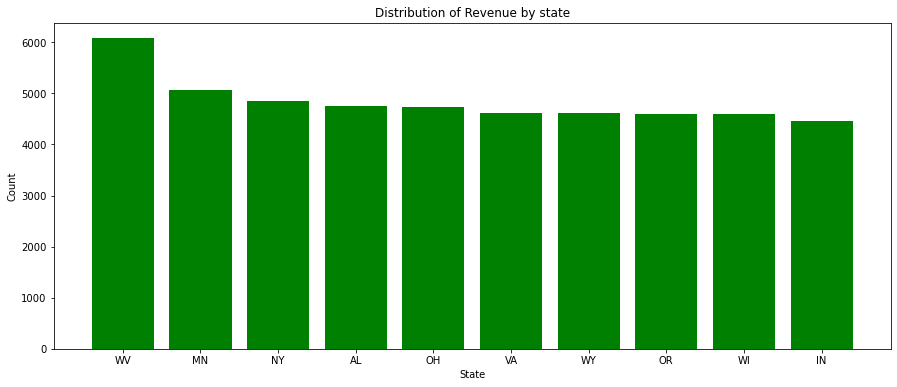

In [11]:
# get all the states
state_expenditure = df[['state', 'total_expenditure']]

# group our data by state and pick the top 10 states
state_expenditure = state_expenditure.groupby(['state']).sum().reset_index().nlargest(10, 'total_expenditure')

# plot our graph
fig, ax = plt.subplots(figsize=(15, 6))

revenue = state_expenditure['total_expenditure']
data_label = state_expenditure['state']

ax.bar(data_label, revenue, color='green')

ax.set_xlabel("State")
ax.set_ylabel("Count")
ax.set_title("Distribution of Revenue by state");



From our top ten highest revenue states, West Virginia leads with over 6000, with the rest generating revenue between 5000 and 4000

#### 3.4.4 Describe the distribution of revenue by Area Codes
Let's check at the revenue by area codes, to see which sre our top grossing area codes.

In [12]:
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

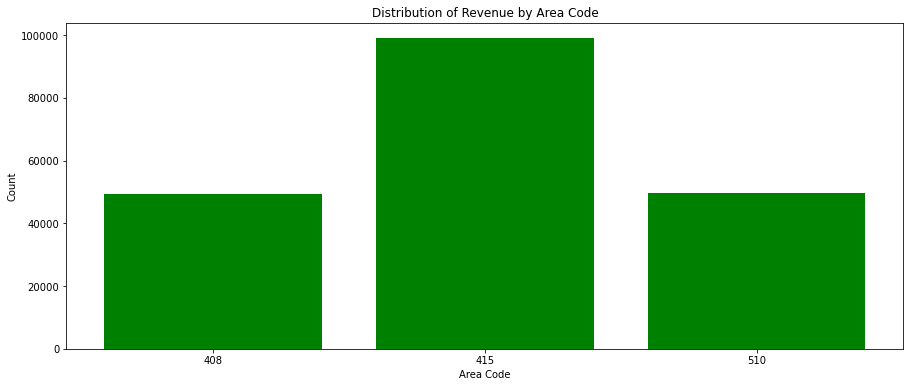

In [13]:
# get all the area codes
area_code_revenue = df[['area_code', 'total_expenditure']]

# group our data by area codes and pick the top 10 
area_code_revenue = area_code_revenue.groupby(['area_code']).sum().reset_index()

revenue = area_code_revenue['total_expenditure']
data_label = [str(x) for x in area_code_revenue['area_code']]

# plot our graph
fig, ax = plt.subplots(figsize=(15, 6))
# data_label

ax.bar(data_label, revenue, color='green')

ax.set_xlabel("Area Code")
ax.set_ylabel("Count")
ax.set_title("Distribution of Revenue by Area Code");

Our data shows us that Area code 415 is our highest grosser with revenue around 100,000 followed by area code 408 the 510.

#### 3.4.5 Describe the relationship between account length and Expenditure

In this section, we'll be exploring to check if there is a relationship between account length and expenditure. Basically, we'll be answering the question, **Do customers who've been with the service for a longer period spend more than those new to the service?**

To answer this question, we be using the columns *account_length* and *total_expenditure*. We will split the columns in two, using the lower quartile, or 25%, so that *account_length* below lower quatile will be considered as new clients, and *total_expenditure* below the lower quartile will be considered as low spenders.

We will then create two new columns to capture the above, and encode them with Zero, for those below the lower quartile, and One otherwise.

In [14]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_expenditure
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,96.150000


In [15]:
# encode our q1
account_length_q1 = 74
total_expenditure_q1 = 52

# populate our regular_account column
df['regular_account'] = 1
df.loc[df["account_length"] < account_length_q1 , "regular_account"] = 0

# populate our high_spender
df['high_spender'] = 1
df.loc[df["total_expenditure"] < total_expenditure_q1, "high_spender"] = 0

Let's view the contingency table for the two new columns to see how they are distributed

In [16]:
contingency_table = pd.crosstab(index=df["regular_account"], columns=df["high_spender"])
contingency_table

high_spender,0,1
regular_account,,
0,198,627
1,590,1918


we will not just stop at that, we will also plot them side by side to have a better view of the distribution

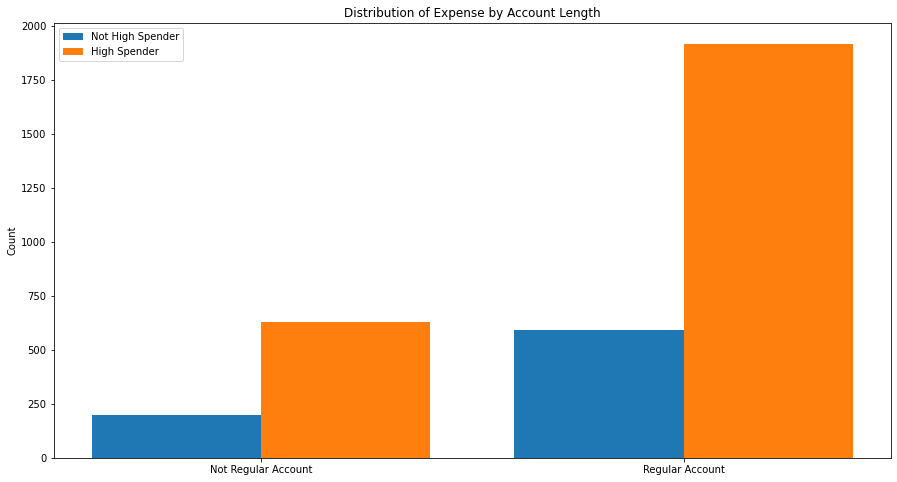

In [17]:
not_high_spender = df.loc[df["high_spender"] == 0, "regular_account"]
high_spender = df.loc[df["high_spender"] == 1, "regular_account"]

fig, ax = plt.subplots(figsize=(15,8))

ax.hist(
    x=[not_high_spender, high_spender],
    label=["Not High Spender", "High Spender"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Regular Account", "Regular Account"])
ax.set_title("Distribution of Expense by Account Length")

ax.legend();

In the above example, because we are comparing two categorical values, we will use a chi-square test to compare the actual and the expected values of our categorical values.

* **Null Hypothesis** : account length and total expenditure are independent
* **Alternative Hypothesis** : account length and total expenditure are not independent

In [18]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("chi-squared p-value:", p)

results_table = pd.concat([pd.DataFrame(expected), contingency_table])
results_table.columns.name = "Expenditure"

results_table.index = ["0 (expected)", "1 (expected)", "0 (actual)", "1 (actual)"]
results_table.index.name = "Regular"
results_table

chi-squared p-value: 0.8169437496565264


Expenditure,0,1
Regular,,
0 (expected),195.049505,629.950495
1 (expected),592.950495,1915.049505
0 (actual),198.000000,627.000000
1 (actual),590.000000,1918.000000


From our finding, our p-value is much greater than 0.05, at 0.8 and thus we cannot reject the Null hypothesis.

This is also consistent with the results we have found. If expenditure was independent of account length, we expected roughly 592 accounts to be low spenders with regular accounts, and 1915 accounts to be high spenders with regular accounts, and the actual resutls we found are off our mark by less or more thn 3 accounts, indicating that Expenditure of an account is not tied by how long the account has been active.

That is, it is not true that accounts that have been active for longer will spend more than accounts that have been around for much short period.

#### 3.4.6 Describe the relationship between having a plan and expenditure

To explore this relationship, we will use the international plan column and the international plan charge, to see if there is a relationship between having a plan and expenditure. This can be translated to answering the question, **Does having a plan make a customer spend more?**

In this example, we will use the lower quartile to separate our international charge, and also create a new column with booleans representing those with international plans.

In [19]:
# create a boolean column representing individuals with international call plans
df['have_intl_plan'] = 1
df.loc[df['international_plan'] == 'no', 'have_intl_plan'] = 0

# create a new boolean column representing high international spenders
df['intl_high_spender'] = 1
df.loc[df['total_intl_charge'] <= 2.3, 'intl_high_spender'] = 0


Let's also create a contingency for these values

In [20]:
contingency_table = pd.crosstab(index=df["intl_high_spender"], columns=df["have_intl_plan"])
contingency_table

have_intl_plan,0,1
intl_high_spender,,
0,793,66
1,2217,257


then plot the contingency, to have a visual of the distribution

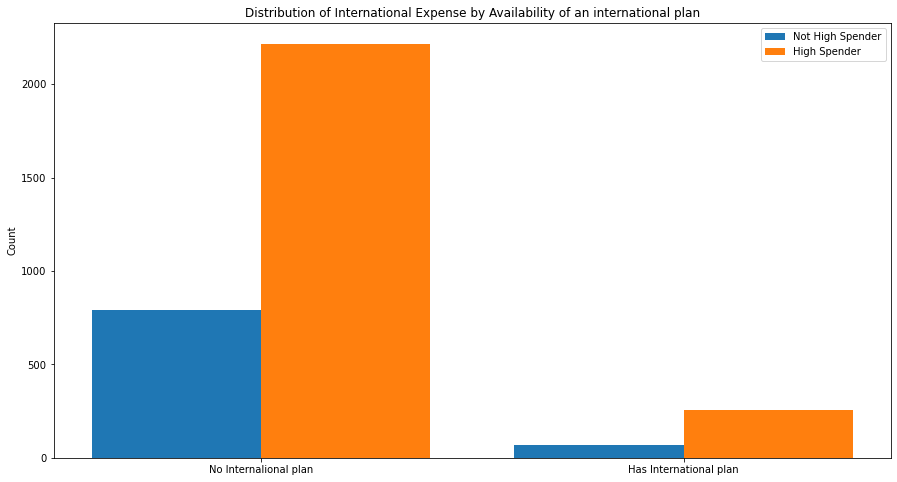

In [21]:
not_high_spender = df.loc[df["intl_high_spender"] == 0, "have_intl_plan"]
high_spender = df.loc[df["intl_high_spender"] == 1, "have_intl_plan"]

fig, ax = plt.subplots(figsize=(15,8))

ax.hist(
    x=[not_high_spender, high_spender],
    label=["Not High Spender", "High Spender"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["No Internalional plan", "Has International plan"])
ax.set_title("Distribution of International Expense by Availability of an international plan")

ax.legend();

Let's go ahead and define our hypotheses and use chi-square to check for the significance of the above.

* **Null Hypothesis** : international plan and total total international expenditure are independent
* **Alternative Hypothesis** : international plan and total total international expenditure are not independent

In [22]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("chi-squared p-value:", p)

results_table = pd.concat([pd.DataFrame(expected), contingency_table])
results_table.columns.name = "has plan"

results_table.index = ["0 (expected)", "1 (expected)", "0 (actual)", "1 (actual)"]
results_table.index.name = "Expenditure"
results_table

chi-squared p-value: 0.024983871701969154


has plan,0,1
Expenditure,,
0 (expected),775.754575,83.245425
1 (expected),2234.245425,239.754575
0 (actual),793.000000,66.000000
1 (actual),2217.000000,257.000000


Our p_value is less than 0.05, hence we can reject the null hypothesis and conclude that accounts with international plans tend to spend more on average than those without.

This as also evident from our contingency table results, where we expected about 239 account to have the plan and be high spenders. and we found 257 accounts instead to have the plan and be high spenders. The difference is not as big, but the p_values is small enough to make us confident about these results.

Let us then try and check by how much on average that do those with an international plan tend to spend more than those without, on international charge.

In [23]:
df1 = df[['have_intl_plan', 'total_intl_charge']]
df1.groupby('have_intl_plan').mean()

,total_intl_charge
have_intl_plan,
0,2.753279
1,2.869907


We can see that on average, accounts with international plan use 0.116628 Units about 4.2%.

### 3.4.7 Preprocessing
Before moving into the Modelling part of this project, let's first do some final data preparations, including;


**1. Dealing with multicollinearity.**

We'll be using VIF(Variancle Inflation Factor) to check for highly correlated predictor values, and cfigure out how to handle them.

In [24]:
# drop the columns that were feature engineered in the previous session
# together with the object values
values_to_check_multi_col = ['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls']

# create a dataframe vif to store our vif output
X = df[values_to_check_multi_col]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
5,1.246078e+08,total_day_charge
3,1.246034e+08,total_day_minutes
8,3.741886e+07,total_eve_charge
6,3.741752e+07,total_eve_minutes
9,1.071952e+07,total_night_minutes
11,1.071916e+07,total_night_charge
14,9.979114e+05,total_intl_charge
12,9.975354e+05,total_intl_minutes
1,6.102501e+01,area_code
10,2.460108e+01,total_night_calls


As we can see from our VIF check, most of our VIF are above 5, signalling some multicollinearity in our data set.

To remove the multicollinearity, we have two options, the first is to remove the values with high VIF, the second is to create a new feature from the correlated values. Looking at our data set, we can see that *total charge* and *total minutes* are representative of the same values, and that *total charge* for the respective periods is a factor of the *total minutes*.

Knowing this, we can drop one, and still retain our datasets value. Lets go ahead and drop *total minutes* and recheck our VIF values.

In [25]:
values_to_check_multi_col = ['account_length', 'area_code', 'number_vmail_messages',
       'total_day_calls', 'total_day_charge',
       'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'customer_service_calls']


# create a dataframe vif to store our vif output
X = df[values_to_check_multi_col].copy()


vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,60.933137,area_code
7,24.596965,total_night_calls
5,23.723994,total_eve_calls
3,23.585816,total_day_calls
8,15.730470,total_night_charge
6,15.601088,total_eve_charge
10,13.648424,total_intl_charge
4,11.448811,total_day_charge
0,7.290513,account_length
9,4.269930,total_intl_calls


That is much better, we have managed to reduce our VIF from the thousands to a max of 60. Normally a VIF should be atleast 5, but in this case because we are doing a prediction, multicollinearity should not be able to greatly affect my model, and so, we'll proceed with the about VIF

**2. Define our X and y columns**

We'll now need to move into creading our models, let's define our features and target into X for features and y for the target. the do a split test on these datasets.

In [26]:
features_to_include_in_X = ['account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
        'total_day_calls', 'total_day_charge',
        'total_eve_calls', 'total_eve_charge',
        'total_night_calls', 'total_night_charge',
        'total_intl_calls', 'total_intl_charge',
       'customer_service_calls']

# we have dropped the total_minutes because of multicollinearity, together with state and phone
X = df[features_to_include_in_X]
y = df['churn']

In [27]:
# do our split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

## 4. Modelling

We will be creating a logistic regression model in this section, because the kind of question we are answering is a binary type of a question, in particular, we are going to answer the question, **Is a particular target going to churn or not**.

After building our model, we'll check for overfitting and/or underfitting, at which point, depending on the one that arises, we'll deal with them accordingly.
Regularization will probably be needed, because our modelling did have some considerable multicollinearirty, the regularization will thus be used to penalise these, in particular, a lasso will be used.

We'll be using a RSS, as a measure of loss in our model.

In terms of checking for how well our model works on unseen data, we'll generate a classification report, with all the metrics of measuring validation; precision, recall, accuracy and f1, after which, we'll use the most appropriate with the question at hand.

### 4.1 Scalling and Transformation

In [28]:
# dealing with categorical features
categorical_values = X_train[['international_plan', 'voice_mail_plan']]
numerical_values = X_train.drop(categorical_values, axis=1)

# use pandas get dummies to handle the categorical data
new_cat_df = pd.get_dummies(categorical_values, drop_first=True)

# scalling
# instantiate
scaler = StandardScaler()

# fit and transform
num_scaled = pd.DataFrame(
    scaler.fit_transform(numerical_values),
    index = numerical_values.index,
    columns= numerical_values.columns
)

# create a new df from the encoding
X_train_scaled = num_scaled.join(new_cat_df)

X_train_scaled 

,account_length,area_code,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_yes,voice_mail_plan_yes
459,0.209339,-0.522681,-0.590358,0.978116,0.074839,0.968500,-1.565162,-0.729025,-0.938015,-0.606853,0.280882,-1.167661,0,0
583,1.614246,-0.688339,-0.590358,-1.280160,-0.539400,-0.342554,-0.143609,-0.369872,2.163207,-1.016233,0.027610,-0.410612,0,0
2843,0.384953,-0.522681,-0.590358,0.024621,-2.132750,-0.241704,-0.090703,-0.677718,0.167069,0.621287,-0.079031,-0.410612,0,0
103,-0.141887,-0.688339,-0.590358,-0.075746,-0.824389,0.312973,-0.327628,0.091896,0.861568,1.849428,0.827415,-0.410612,0,0
3030,-1.596969,-0.522681,-0.590358,0.777380,0.210856,-0.040003,-0.645063,0.604971,0.293738,0.211907,1.360619,1.103485,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,-0.342588,1.725536,-0.590358,0.426093,0.793789,-0.695531,-1.424847,-0.882948,1.726416,-0.197473,1.547240,1.103485,0,0
1667,-0.568377,-0.522681,-0.590358,-0.778321,0.242162,0.262548,-0.553053,0.964124,-1.414118,-1.425613,-0.012380,-1.167661,0,0
3321,-1.019954,-0.522681,-0.590358,0.877748,0.256195,0.514673,-2.255237,1.733738,0.167069,1.440048,1.067357,1.103485,0,0
1688,-0.066624,-0.522681,-0.590358,0.325725,-1.965427,0.161697,-0.274723,0.502356,-0.514326,-0.197473,0.107591,1.103485,0,0


### 4.2 Base Model

Our base model will be a logistics model consisting of a very large C and a solver of 'liblinear' passed into the logistic regresion model

In [29]:
# build our base model
# instantiate
log_model = LogisticRegression(fit_intercept=False, C=1e10, solver='liblinear')

# fit  the model
log_model.fit(X_train_scaled, y_train)
log_model

LogisticRegression(C=10000000000.0, fit_intercept=False, solver='liblinear')

In [30]:
# predict our target
y_hat_train = log_model.predict(X_train_scaled)

# let's check for the accuracy of our model by calculating the Residuals Square Sum
# get the absolute value of our residuals
train_residuals = np.abs(y_train - y_hat_train)

print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    2287
1     379
Name: Residuals (counts), dtype: int64

0    0.857839
1    0.142161
Name: Residuals (proportions), dtype: float64


Our model was able to predict 86% of our train target correctly, let's see how it would work on unseen data, by testing it on our test dataset

In [31]:
## Deal with categorical columns ##
categorical_values = X_test[['international_plan', 'voice_mail_plan']]
numerical_values = X_test.drop(categorical_values, axis=1)

## Transform categorical columns ##
# use pandas get dummies to handle the categorical data
new_cat_df = pd.get_dummies(categorical_values, drop_first=True)


## scalling ##
# instantiate
scaler = StandardScaler()

# fit and transform
num_scaled = pd.DataFrame(
    scaler.fit_transform(numerical_values),
    index = numerical_values.index,
    columns= numerical_values.columns
)

# create a new df from the encoding
X_test_scaled = num_scaled.join(new_cat_df)


## predict using our initial model ##
y_hat_test = log_model.predict(X_test_scaled)

## calculate our RSS ##
test_residuals = np.abs(y_test - y_hat_test)

print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    569
1     98
Name: Residuals (counts), dtype: int64

0    0.853073
1    0.146927
Name: Residuals (proportions), dtype: float64


Let's check for the precision, recall, accuracy and f1 score, to see more details about our models performance on the test set.

In [32]:
# Create a function to check the precision, recall, accuracy and f1 of our models
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

print_metrics(y_test, y_hat_test)

Precision Score: 0.45
Recall Score: 0.19148936170212766
Accuracy Score: 0.8530734632683659
F1 Score: 0.26865671641791045


Our Accuracy is quite good, at 85%, this is the total number of predictions our model got right. This can be quite an illusive because of the level of imbalance in our dataset. One class is about 85% of the dataset, this means that even by randomly guessing the larger class, by probability, we should have an accuracy of 85%.

Let's us build another model, this time, let's consider reducing the imbalance of our classes in the dataset using SMOTE, and use ROC(Receiver Operating Characteristic) Curve and AUC for validating our model instead of RSS(Residue Squared Sum).

### 4.3 Model 2 : with some tuning

Let's first plot the vanilla Logistic Regression model, with ROC and AUC for our model validation

Train AUC: 0.8282286371031202
Test AUC: 0.7963313653410568


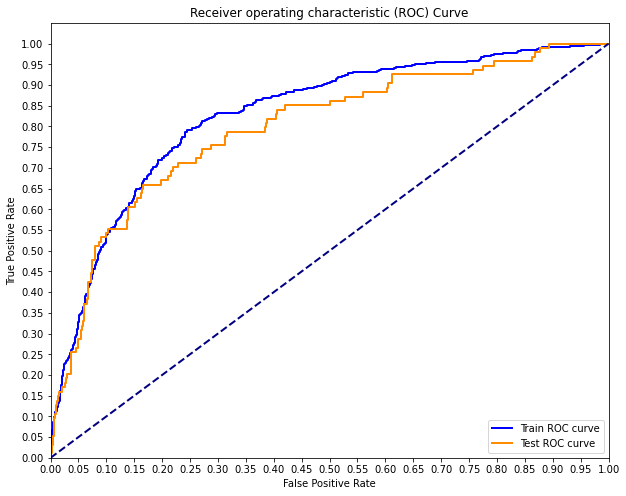

In [33]:
# Initial Model
log_model_2 = LogisticRegression()

log_model_2.fit(X_train_scaled, y_train)

y_train_score = log_model_2.decision_function(X_train_scaled)
y_test_score = log_model_2.decision_function(X_test_scaled)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

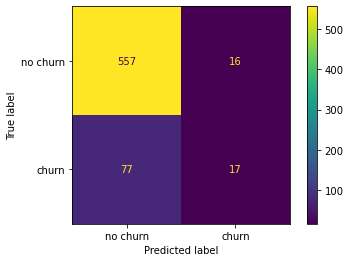

In [34]:
# confusion report
# Plot confusion matrix of the test set
plot_confusion_matrix(log_model_2, X_test_scaled, y_test,
                      display_labels=["no churn", "churn"],
                      values_format=".5g")
plt.grid(False) # removes the annoying grid lines from plot
plt.show()

In [35]:
y_hat_test = log_model_2.predict(X_test_scaled)
print_metrics(y_test, y_hat_test)

Precision Score: 0.5151515151515151
Recall Score: 0.18085106382978725
Accuracy Score: 0.8605697151424287
F1 Score: 0.2677165354330709




Because of the imbalance and nature of our problem(Binary target), using Residue for validation could have easily tricked us, thats why using a more reliable metric for validation like ROC curve and AUC which allow us to determine optimal precision-recall tradeoff balances specific to the problem you are looking to solve.

Let's now remove the imbalance and try to tune our model more to increase our scores.

### 4.4 Model 3 : More tuning

We'll use SMOTE to offset the imbalance, to see if we'd get a better AUC curve with that.

Train AUC: 0.8212874771275414
Test AUC: 0.7915042144740262


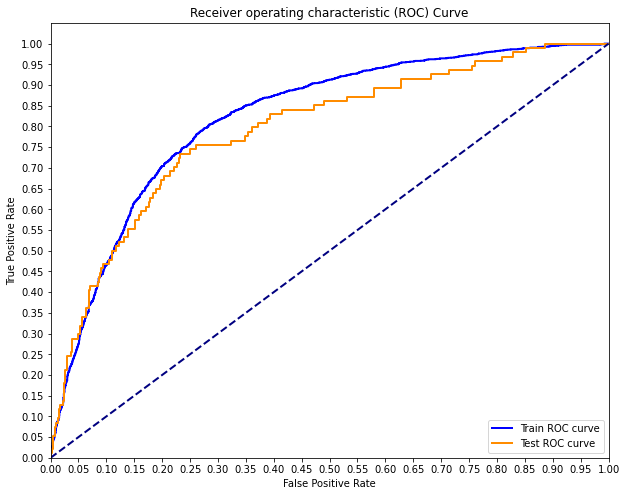

In [36]:
# handle the imbalance
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)

log_model_3 = LogisticRegression()

log_model_3.fit(X_train_resampled, y_train_resampled)

y_train_score = log_model_3.decision_function(X_train_resampled)
y_test_score = log_model_3.decision_function(X_test_scaled)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


let's see how these results reflect on a confusion matrix and a classification report.

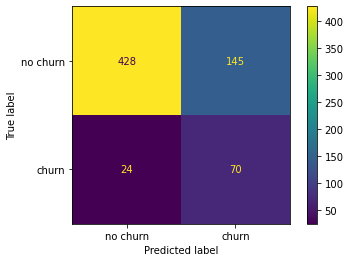

In [37]:
# confusion report
# Plot confusion matrix of the test set
plot_confusion_matrix(log_model_3, X_test_scaled, y_test,
                      display_labels=["no churn", "churn"],
                      values_format=".5g")
plt.grid(False) # removes the annoying grid lines from plot
plt.show()

In [38]:
y_hat_test = log_model_3.predict(X_test_scaled)
print_metrics(y_test, y_hat_test)

Precision Score: 0.32558139534883723
Recall Score: 0.7446808510638298
Accuracy Score: 0.7466266866566716
F1 Score: 0.45307443365695793


So with resampling, our model accuracy actually reduced from 86% down to 73%, however, our recall and f1-score have made some improvements, showing that the model has started to get some balanced predictions between the precision and recall. going forward, we'll consider F1-score as the most importance metric for our validation, and put more emphasis on increasing it.

Let's build another model this time, ultering the parameters, to see if this might improve our model

Train AUC: 0.8184375692538608
Test AUC: 0.7891092050053842


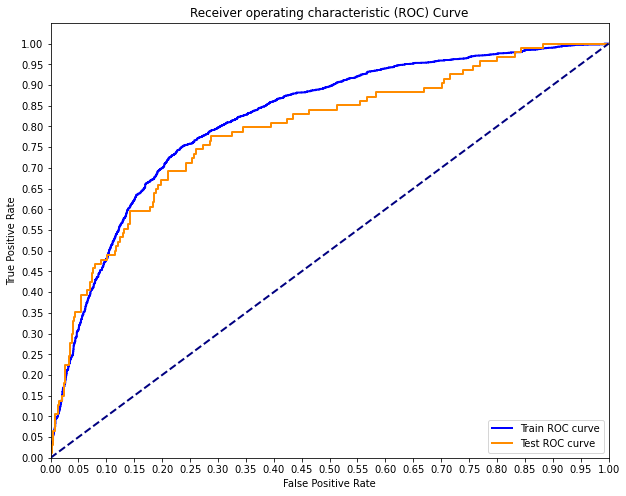

In [39]:
# handle the imbalance
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)

log_model_4 = LogisticRegression(C=1e7, class_weight={1:0.28}, random_state=3)

log_model_4.fit(X_train_resampled, y_train_resampled)

y_train_score = log_model_4.decision_function(X_train_resampled)
y_test_score = log_model_4.decision_function(X_test_scaled)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
y_hat_test = log_model_4.predict(X_test_scaled)
print_metrics(y_test, y_hat_test)

Precision Score: 0.5238095238095238
Recall Score: 0.35106382978723405
Accuracy Score: 0.863568215892054
F1 Score: 0.42038216560509556


Despite resampling and changing the models parameters, our scores seem to reduce, the recall has reduced drastically. <br>

`log_model_2` still seems to be the best model in terms of generalizing well with unseen data. <br>
We'll take that as our best model using Logistic Regression, and try building another model using a <br>
difference algorith that gives more flexibility in terms of tuning hyperperimeters.

**K-NEAREST-NEIGHBORS**

We'll be using a more flexible algorithm(KNN) to check if we could improve the performance of our model. <br>
Then use `cross_val_score` with `scoring="neg_log_loss"` to find the mean log loss for this model

Let's first build a basic KNN model without parameters

In [41]:
# instansiate our model
model_5 = KNeighborsClassifier()

# calculate the models perfomance on train dataset with imbalance managed
model_5_log_loss = -cross_val_score(model_5, X_train_resampled, y_train_resampled, scoring='neg_log_loss').mean()

model_5_log_loss

0.9141314110239056

In [42]:
model_5.fit(X_train_resampled, y_train_resampled)

y_hat_test = model_5.predict(X_test_scaled)
print_metrics(y_test, y_hat_test)

Precision Score: 0.3387096774193548
Recall Score: 0.6702127659574468
Accuracy Score: 0.7691154422788605
F1 Score: 0.45


The scores, in particular Recall and f1, improved, giving us some hope of getting a much better model with this algorithm. Let's add some hyperparameters, and check for improvement

In [43]:
# instansiate our model
model_6 = KNeighborsClassifier(n_neighbors=20)

# calculate the models perfomance on train dataset with imbalance managed
model_6_log_loss = -cross_val_score(model_6, X_train_resampled, y_train_resampled, scoring='neg_log_loss').mean()

model_6_log_loss

0.3885329236295826

In [44]:
model_6.fit(X_train_resampled, y_train_resampled)

y_hat_test = model_6.predict(X_test_scaled)
print_metrics(y_test, y_hat_test)

Precision Score: 0.391304347826087
Recall Score: 0.7659574468085106
Accuracy Score: 0.7991004497751124
F1 Score: 0.5179856115107915


specifying number of neighbours to  20 has reduced our log-loss by almost two thirds, has improved each and every score ,with f1 being at 52%, and both recall and accuracy almost balancing. Let's try and increase the number of neighbors, to try and get a better number of neighbors.

In [45]:
# instansiate our model
model_7 = KNeighborsClassifier(n_neighbors=35)

# calculate the models perfomance on train dataset with imbalance managed
model_7_log_loss = -cross_val_score(model_7, X_train_resampled, y_train_resampled, scoring='neg_log_loss').mean()

model_7_log_loss

0.4124725549040857

In [46]:
model_7.fit(X_train_resampled, y_train_resampled)

y_hat_test = model_7.predict(X_test_scaled)
print_metrics(y_test, y_hat_test)

Precision Score: 0.39378238341968913
Recall Score: 0.8085106382978723
Accuracy Score: 0.7976011994002998
F1 Score: 0.5296167247386759


This has reduced our reduced our f1 score, which indicates to us that 35 is not our optimal number of neighbors. let't try some other number below 20, lets take 15.

In [47]:
# instansiate our model
model_8 = KNeighborsClassifier(n_neighbors=15)

# calculate the models perfomance on train dataset with imbalance managed
model_8_log_loss = -cross_val_score(model_8, X_train_resampled, y_train_resampled, scoring='neg_log_loss').mean()

model_8_log_loss

0.3782353003090388

In [48]:
model_8.fit(X_train_resampled, y_train_resampled)

y_hat_test = model_8.predict(X_test_scaled)
print_metrics(y_test, y_hat_test)

Precision Score: 0.35323383084577115
Recall Score: 0.7553191489361702
Accuracy Score: 0.7706146926536732
F1 Score: 0.48135593220338985


That doesn't do us any better, but indicates to us that our optimal number of neighbors lie between 15 and 20.

For now, we pick the best number of neighbors as 20, and since it had our best f1-score of all our model, we'll consider it as our best and final model.

## 5. Evaluation

**Final model**

Let's once again create our final model

In [49]:
# instansiate our model
final_model = KNeighborsClassifier(n_neighbors=20)

final_model.fit(X_train_resampled, y_train_resampled)

y_hat_test = final_model.predict(X_test_scaled)
print_metrics(y_test, y_hat_test)

Precision Score: 0.391304347826087
Recall Score: 0.7659574468085106
Accuracy Score: 0.7991004497751124
F1 Score: 0.5179856115107915


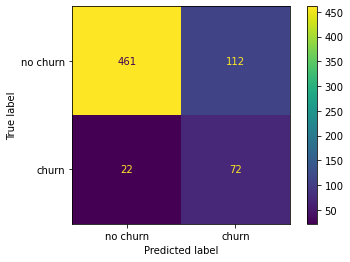

In [50]:
# confusion report
# Plot confusion matrix of the test set
plot_confusion_matrix(final_model, X_test_scaled, y_test,
                      display_labels=["no churn", "churn"],
                      values_format=".5g")
plt.grid(False) # removes the annoying grid lines from plot
plt.show()

Precision measures how precise our model is, at 38.7%, this indicates to us that of the positive values predicted, roughly 39% were actually true. 
Recall measures the portion of actual values that we're predicted,cthis indicates that on unseen data, our model is able to correctly account for about 79% of our desired prediction, that is churning. The accuracy of the the model, that is, the predictions the model got correctly are 79%, and finaly, our final score the f1-score, which ensure a balance between the precision and recall is at 52%, this can be concluded to have been a result of the very low precision score.

In terms of solving for our stakeholder questio of churning, our model is able to detect churning with an accuracy of 79%.

## 6. Findings and Recommendations

Understanding the customers' behaviours, makes it possible for different departments to know where to focus their attention. Decisions like where to deploy the most effective and aggressive sales team, where to focus a new advertisement, or even what kinds of products to develop or drop, can be reached at with confidence that there was need for that particular decision or investment, and that the earlier identified behaviors can be thwarted if negative, and promoted if desireable.

With this in mind, below is a summary of the findings to questions asked earlier;

| Question of interest       | Finding        |
| ------------- |-------------|
| What is the distribution of Expenditure by Time of the day?     | From our distribution, we can see that `day generates for us the highest revenue at more than 100,000`<br> and international calls generate the least revenue at less than 10,000. |
| What is the distribution of Revenue by State?     | From our top ten highest revenue states, `West Virginia leads with over 6000`, with the rest<br> generating revenue between 5000 and 4000     |
| What is the distribution of revenue by Area Codes? | Our data shows us that `Area code 415 is our highest grosser with revenue around 100,000`<br> followed by area code 408 the 510.      |
| What is the relationship between account length and Expenditure? | `It is not true that accounts that have been active for longer will`<br> `spend more` on average than accounts that have been around for much short period.      |
| What is the relationship between having a plan and expenditure? | `Accounts with international plans tend to spend more` on average than those without international plan.     |

<br>
<br>
<br>
Some of the recommendations that we might give to the different departments include;

**Develop plans for day, evening and night call.**

From our analysis of people making international call while on a plan and those making international calls without an international plan, we found out that those with a plan tend to spend 4% on average. With this in mind, the products development team should comeup with new product plans for each of the periods of the day, in particular the once with high revenue like *day time*, this has a potential to increase those revenues by upto 4%.


**Develop the plans for all customers, with little considerations for account length**

Our analysis also indicated that expenditure is not dependent on account length, that is, amount spent by an account has little to no ties with how long the account has been active, and so, when creating the different plans, little or no considerations should be given to account length, as it is likely to have little effect in the amount spent by an account.

## 7. Next Steps

As a conclusion, some of the area of interest/questions that arose from these analysis that might be worth exploring further include;
* What makes a state perform better than its counterparts?
* What are some of the indicators of high expenditure by an account?